In [5]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

In [6]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

# **Inisialisasi Dataset**

## **Dataset Fashion mnist**

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


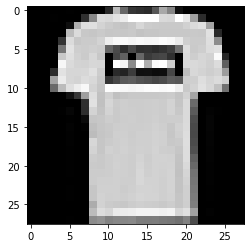

In [9]:
(feature_train_fashion, label_train_fashion), (feature_test_fashion, label_test_fashion) = fashion_mnist.load_data()

print("Train", feature_train_fashion.shape, label_train_fashion.shape)
print("Test", feature_test_fashion.shape, label_test_fashion.shape)

plt.imshow(feature_train_fashion[1], cmap=plt.get_cmap('gray'))

In [10]:
feature_train_fashion = feature_train_fashion.reshape((feature_train_fashion.shape[0], 28, 28, 1))
feature_test_fashion = feature_test_fashion.reshape((feature_test_fashion.shape[0], 28, 28, 1))

print(feature_train_fashion.shape)

(60000, 28, 28, 1)


In [11]:
label_train_fashion = to_categorical(label_train_fashion)
label_test_fashion = to_categorical(label_test_fashion)

print(label_train_fashion)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
feature_train_fashion = feature_train_fashion.astype('float32')
feature_test_fashion = feature_test_fashion.astype('float32')

feature_train_fashion = feature_train_fashion / 255.0
feature_test_fashion = feature_test_fashion / 255.0

## **Dataset Mnist**

Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


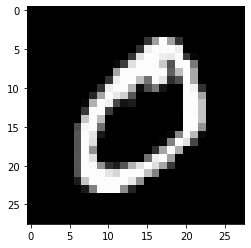

In [14]:
(feature_train_mnist, label_train_mnist), (feature_test_mnist, label_test_mnist) = mnist.load_data()

print("Train", feature_train_mnist.shape, label_train_mnist.shape)
print("Test", feature_test_mnist.shape, label_test_mnist.shape)

plt.imshow(feature_train_mnist[1], cmap=plt.get_cmap('gray'))

In [15]:
feature_train_mnist = feature_train_mnist.reshape((feature_train_mnist.shape[0], 28, 28, 1))
feature_test_mnist = feature_test_mnist.reshape((feature_test_mnist.shape[0], 28, 28, 1))

print(feature_train_mnist.shape)

(60000, 28, 28, 1)


In [16]:
label_train_mnist = to_categorical(label_train_mnist)
label_test_mnist = to_categorical(label_test_mnist)

print(label_train_mnist)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [17]:
feature_train_mnist = feature_train_mnist.astype('float32')
feature_test_mnist = feature_test_mnist.astype('float32')

feature_train_mnist = feature_train_mnist / 255.0
feature_test_mnist = feature_test_mnist / 255.0

# **No.1 Melihat yang terbaik dari 2 Arsitektur DeepLearning**

## **Multilayer Perceptron (Neural Network)**

In [18]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

base_model.summary()

# base_model.fit(feature_train_fashion, label_train_fashion, batch_size=32, validation_data=(feature_test_fashion, label_test_fashion), epochs=10)
history1=base_model.fit(feature_train_fashion, label_train_fashion, batch_size=32, validation_data=(feature_test_fashion, label_test_fashion), epochs=10)

loss, accuracy = base_model.evaluate(feature_test_fashion,  label_test_fashion, verbose=2)

print("\nTest accuracy:", accuracy)
print("Test loss:", loss)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5240 - accuracy: 0.8150 - val_loss: 0.4799 - val_accuracy: 0.8275
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3966 - accuracy: 0.8554 - val_loss: 0.3964 - val_accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3606 - accurac

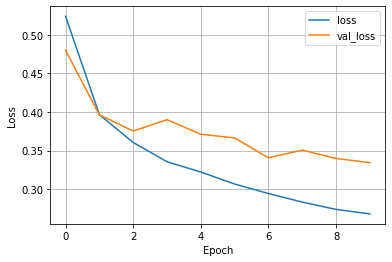

In [19]:
plot_loss(history1)

## **Convolutional Neural Network (CNN)**

In [20]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

# model.fit(feature_train_fashion, label_train_fashion, batch_size=32, validation_data=(feature_test_fashion, label_test_fashion), epochs=10)
history2=model.fit(feature_train_fashion, label_train_fashion, batch_size=32, validation_data=(feature_test_fashion, label_test_fashion), epochs=10)

loss, accuracy = model.evaluate(feature_test_fashion,  label_test_fashion, verbose=2)

print("\nTest accuracy:", accuracy)
print("Test loss:", loss)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4185 - accuracy: 0.8501 - val_loss: 

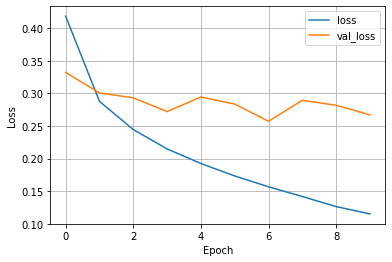

In [21]:
plot_loss(history2)

## **Kesimpulan**

Berdasarkan hasil percobaan di atas dapat di lihat bahwa penggunaan CNN(convolutional Neural Network) mendapat nilai loss yang kecil dan akurasi yang sangat baik yakni 91% ini dapat terjadi karena algoritma CNN sendiri lebih efisien dan efektif secara algoritma karena memanfaatkan nilai spatial dalam hal ini RGB dengan filter yang ada jadi algoritma ini melihat masih adanya korelasi dari nilai-nilai tersebut maka dapat mengurangi jumlah parameter dan weight.

refrensi:

https://www.quora.com/What-is-the-difference-between-a-convolutional-neural-network-and-a-multilayer-perceptron

https://medium.com/data-science-bootcamp/multilayer-perceptron-mlp-vs-convolutional-neural-network-in-deep-learning-c890f487a8f1

# **No.2 membuat convolution layer lebih dalam**

## **Dataset Mnist**

### **Convolution kedalaman 2**

In [22]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
model.add(MaxPooling2D((2, 2))) # Pooling
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

# model.fit(feature_train_mnist, label_train_mnist, batch_size=32, validation_data=(feature_test_mnist, label_test_mnist), epochs=10)
history3=model.fit(feature_train_mnist, label_train_mnist, batch_size=32, validation_data=(feature_test_mnist, label_test_mnist), epochs=10)

loss, accuracy = model.evaluate(feature_test_mnist,  label_test_mnist, verbose=2)

print("\nTest accuracy:", accuracy)
print("Test loss:", loss)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

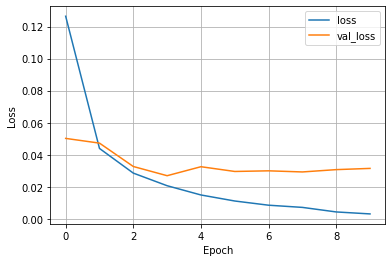

In [23]:
plot_loss(history3)

## **Dataset Fashion Mnist**

### **Convolution kedalaman 2**

In [24]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
model.add(MaxPooling2D((2, 2))) # Pooling
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3
model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

# model.fit(feature_train_fashion, label_train_fashion, batch_size=32, validation_data=(feature_test_fashion, label_test_fashion), epochs=10)

history4=model.fit(feature_train_fashion, label_train_fashion, batch_size=32, validation_data=(feature_test_fashion, label_test_fashion), epochs=10)

loss, accuracy = model.evaluate(feature_test_fashion,  label_test_fashion, verbose=2)

print("\nTest accuracy:", accuracy)
print("Test loss:", loss)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

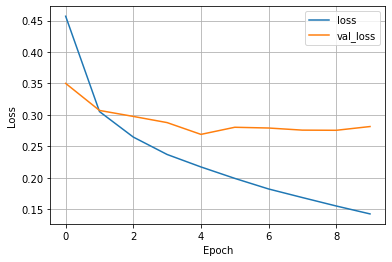

In [25]:
plot_loss(history4)

## **Kesimpulan**

akurasi untuk data set Fashion tidak berbeda dengan untuk yang kedalaman 1 ataupun 2. ini dapat terjadi mungkin karena data yang ada kurang bisa untuk menggambarkan dengan jelas perbedaan dalam klasifikasi karena kembali lagi kualitas data yang ada dengan piksel yang kecil. 

tetapi sebaliknya untuk data number yang ada malah nilainya tinggi sekali hampir mendekati sempurna. ini terjadi karena angka mudah untuk di klasifikasikan dan bentuknya kurang lebih sama.